In [66]:
print('Started..')

Started..


## Imports

In [66]:
## ------ Imports ------
import pandas as pd
import matplotlib as mp 
import numpy as np
import tensorflow as tf 
import keras as ks
import csv
import random
import math
from itertools import islice
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error

## Human Observed Dataset

In [ ]:
# --------------------------------------- Human Observed Dataset ----------------------------------------------
# ------ Feature Data ------
Loc_hum_fea_data = r'../HumanObserved-Dataset/HumanObserved-Features-Data/HumanObserved-Features-Data.csv'

# ------ Same Pairs ------
Loc_hum_fea_same = r'../HumanObserved-Dataset/HumanObserved-Features-Data/same_pairs.csv'

# ------ Diff Pairs ------
Loc_hum_fea_diffn = r'../HumanObserved-Dataset/HumanObserved-Features-Data/diffn_pairs.csv'

# ------ Read csv files ------
df_hum_fea_data_A = pd.read_csv(Loc_hum_fea_data, names=['img_id_A','fA1','fA2','fA3','fA4','fA5','fA6','fA7','fA8','fA9'])
df_hum_fea_data_A.drop(df_hum_fea_data_A.index[0], inplace=True)
print(df_hum_fea_data_A)

df_hum_fea_data_B = pd.read_csv(Loc_hum_fea_data, names=['img_id_B','fB1','fB2','fB3','fB4','fB5','fB6','fB7','fB8','fB9'])
df_hum_fea_data_B.drop(df_hum_fea_data_B.index[0], inplace=True)

# ----------------------------- Concat Pairs ----------------------------- 
# -- Same Pairs -- 
df_same_pair = pd.read_csv(Loc_hum_fea_same)
df_hum_fea_same_pair_A = pd.merge(df_same_pair,df_hum_fea_data_A,on='img_id_A')
df_hum_fea_same_pair_A_plus_B = pd.merge(df_hum_fea_same_pair_A,df_hum_fea_data_B,on='img_id_B') 
df_hum_fea_same_pair_A_plus_B = df_hum_fea_same_pair_A_plus_B[['img_id_A','img_id_B','fA1','fA2','fA3','fA4','fA5','fA6','fA7','fA8','fA9','fB1','fB2','fB3','fB4','fB5','fB6','fB7','fB8','fB9','target']]
#print(df_hum_fea_same_pair_A_plus_B)

# -- Diff Pairs -- 
df_diffn_pair = pd.read_csv(Loc_hum_fea_diffn)
df_hum_fea_diff_pair_A = pd.merge(df_diffn_pair,df_hum_fea_data_A,on='img_id_A')
df_hum_fea_diff_pair_A_plus_B = pd.merge(df_hum_fea_diff_pair_A,df_hum_fea_data_B,on='img_id_B')
df_hum_fea_diff_pair_A_plus_B = df_hum_fea_diff_pair_A_plus_B[['img_id_A','img_id_B','fA1','fA2','fA3','fA4','fA5','fA6','fA7','fA8','fA9','fB1','fB2','fB3','fB4','fB5','fB6','fB7','fB8','fB9','target']]

frames_concat = [df_hum_fea_same_pair_A_plus_B,df_hum_fea_diff_pair_A_plus_B]
df_hum_fea_concatd_data_set = pd.concat(frames_concat)
df_hum_fea_concatd_data_set.to_csv('human_fea_concat.csv',index=False)

# ----------------------------- Substract Pairs ---------------------------

main_sub = df_hum_fea_concatd_data_set.iloc[:,0:2]

subset_1 = df_hum_fea_concatd_data_set.iloc[:,2:11]
sub1_ty = subset_1.astype('int64', copy=False)
sub1_ty.columns = sub1_ty.columns.str.replace('fA','f')

subset_2 = df_hum_fea_concatd_data_set.iloc[:,11:20]
sub2_ty = subset_2.astype('int64',copy=False)
sub2_ty.columns = sub2_ty.columns.str.replace('fB','f')

substract_sub = abs(sub1_ty.iloc[:,0:] - sub2_ty.iloc[:,0:])
substract_sub = substract_sub.astype('object',copy=False)

target_sub = df_hum_fea_concatd_data_set.iloc[:,20]

frames_sub = [main_sub,target_sub,substract_sub]
df_hum_fea_sub_data_set = pd.concat(frames_sub,ignore_index=False,axis=1)
df_hum_fea_sub_data_set.to_csv('human_fea_sub.csv',index=False)
# < TODO :: Write to File>

## GSC Observed Data

In [94]:
# ---------------------------------------------- GSC Observed Data --------------------------------------------
# ------ Feature Data ------
Loc_gsc_fea_data = r'../GSC-Dataset/GSC-Features-Data/GSC-Features.csv'

# ------ Same Pairs ------
Loc_gsc_fea_same = r'../GSC-Dataset/GSC-Features-Data/same_pairs.csv'

# ------ diffn Pairs ------
Loc_gsc_fea_diffn = r'../GSC-Dataset/GSC-Features-Data/diffn_pairs.csv'

# ------ Read csv Files ------
df_gsc_fea_data = pd.read_csv(Loc_gsc_fea_data)
df_gsc_fea_data_A = df_gsc_fea_data.rename(columns = {'img_id':'img_id_A'})
df_gsc_fea_data_A.columns = df_gsc_fea_data_A.columns.str.replace('f','fA')
df_gsc_fea_data_B = df_gsc_fea_data.rename(columns = {'img_id':'img_id_B'})
df_gsc_fea_data_B.columns = df_gsc_fea_data_B.columns.str.replace('f','fB')

# ----------------------------- Concat Pairs ----------------------------- 
# -- Same Pairs --
df_gsc_same_pair = pd.read_csv(Loc_gsc_fea_same)
df_gsc_fea_same_pair_A = pd.merge(df_gsc_same_pair,df_gsc_fea_data_A,on='img_id_A')
df_gsc_fea_same_pair_A_plus_B = pd.merge(df_gsc_fea_same_pair_A,df_gsc_fea_data_B,on='img_id_B')

# -- Diff Pairs --
df_gsc_diff_pair = pd.read_csv(Loc_gsc_fea_diffn)
df_gsc_fea_diff_pair_A = pd.merge(df_gsc_diff_pair,df_gsc_fea_data_A,on='img_id_A')
df_gsc_fea_diff_pair_A_plus_B = pd.merge(df_gsc_fea_diff_pair_A,df_gsc_fea_data_B,on='img_id_B')

frames_gsc = [df_gsc_fea_same_pair_A_plus_B,df_gsc_fea_diff_pair_A_plus_B]
df_gsc_fea_concatd_data_set = pd.concat(frames_gsc)
df_gsc_fea_concatd_data_set.to_csv('gsc_fea_concat.csv',index=False)


# ----------------------------- Substract Pairs ---------------------------
# <TODO>
main_gsc_fea_sub = df_gsc_fea_concatd_data_set.iloc[:,0:2]
#print(main_gsc_fea_sub)

sub_1 = df_gsc_fea_concatd_data_set.iloc[:,3:515]
sub1_ty_gsc = sub_1.astype('int64',copy=False)
sub1_ty_gsc.columns = sub1_ty_gsc.columns.str.replace('fA','f')

sub_2 = df_gsc_fea_concatd_data_set.iloc[:,515:]
sub2_ty_gsc = sub_2.astype('int64',copy=False)
sub2_ty_gsc.columns = sub2_ty_gsc.columns.str.replace('fB','f')

substract_sub_gsc = abs(sub1_ty_gsc.iloc[:,0:] - sub2_ty_gsc.iloc[:,0:])
substract_sub_gsc = substract_sub_gsc.astype('object',copy=False)

target_sub_gsc = df_gsc_fea_concatd_data_set.iloc[:,2]

frames_gsc_sub = [main_gsc_fea_sub,target_sub_gsc,substract_sub_gsc]

df_gsc_fea_sub_data_set = pd.concat(frames_gsc_sub,ignore_index=False,axis=1)
df_gsc_fea_sub_data_set.to_csv('gsc_fea_sub.csv',index=False)

In [68]:
print('Done .csv Processing!!')

Done!!


## Prepare Data Subset

In [111]:
# ---- Human Observed Subset ----

# ---- Concat ----
target_0_hum = df_hum_fea_concatd_data_set.loc[df_hum_fea_concatd_data_set['target'] == 0]
hum_target_split_df_0 = target_0_hum.loc[0:807,:]

target_1_hum = df_hum_fea_concatd_data_set.loc[df_hum_fea_concatd_data_set['target'] == 1]
hum_target_split_df_1 =target_1_hum.loc[0:791,:]

frames_split_merged_hum = [hum_target_split_df_0,hum_target_split_df_1]
hum_target_split_merged = pd.concat(frames_split_merged_hum)
hum_target_split_merged = shuffle(hum_target_split_merged)

hum_target_split_merged.to_csv('hum_fea_concat_subset.csv',index=False)

# ---- Substract ----
target_0_hum_sub = df_hum_fea_sub_data_set.loc[df_hum_fea_sub_data_set['target'] == 0]
hum_target_split_df_subtract_0 = target_0_hum_sub.loc[0:807,:]

target_1_hum_sub = df_hum_fea_sub_data_set.loc[df_hum_fea_sub_data_set['target'] == 1]
hum_target_split_df_subtract_1 = target_1_hum_sub.loc[0:807,:]

frames_split_merged_subtract_hum = [hum_target_split_df_subtract_0,hum_target_split_df_subtract_1]
hum_target_split_merged_subtract = pd.concat(frames_split_merged_subtract_hum)
hum_target_split_merged_subtract = shuffle(hum_target_split_merged_subtract)
hum_target_split_merged_subtract.to_csv('hum_fea_subtract_subset.csv',index=False)

img_id_A    1538a
img_id_B    1538c
fA1             1
fA2             1
fA3             1
fA4             3
fA5             2
fA6             3
fA7             1
fA8             2
fA9             1
fB1             0
fB2             2
fB3             1
fB4             0
fB5             2
fB6             1
fB7             1
fB8             0
fB9             2
target          1
Name: 577, dtype: object


In [97]:
# ---- GSC Observed Subset ----

# ---- Concat ----
target_0_gsc = df_gsc_fea_concatd_data_set.loc[df_gsc_fea_concatd_data_set['target'] == 0]
gsc_target_split_df_0 = target_0_gsc.loc[0:807,:]

target_1_gsc = df_gsc_fea_concatd_data_set.loc[df_gsc_fea_concatd_data_set['target'] == 1]
gsc_target_split_df_1 =target_1_gsc.loc[0:791,:]

frames_split_merged_gsc = [gsc_target_split_df_0,gsc_target_split_df_1]
gsc_target_split_merged = pd.concat(frames_split_merged_gsc)
gsc_target_split_merged = shuffle(gsc_target_split_merged)
gsc_target_split_merged.to_csv('gsc_fea_concat_subset.csv',index=False)

# ---- Substract ----
target_0_gsc_sub = df_gsc_fea_sub_data_set.loc[df_gsc_fea_sub_data_set['target'] == 0]
gsc_target_split_df_subtract_0 = target_0_gsc_sub.loc[0:807,:]

target_1_gsc_sub = df_gsc_fea_sub_data_set.loc[df_gsc_fea_sub_data_set['target'] == 1]
gsc_target_split_df_subtract_1 = target_1_gsc_sub.loc[0:807,:]

frames_split_merged_subtract_gsc = [gsc_target_split_df_subtract_0,gsc_target_split_df_subtract_1]
gsc_target_split_merged_subtract = pd.concat(frames_split_merged_subtract_gsc)
gsc_target_split_merged_subtract = shuffle(gsc_target_split_merged_subtract)
gsc_target_split_merged_subtract.to_csv('gsc_fea_subtract_subset.csv',index=False)

## Linear Reg

In [112]:
def GetTarget(filePath):
    t = []
    with open(filePath, 'rU') as f:
        next(f)
        reader = csv.reader(f)
        for row in reader:  
            t.append(float(row[-1]))
        #print("Raw Training Generated..")
    
    return t
def GetRawData(filePath):    
    dataMatrix = [] 
    with open(filePath, 'rU') as fi:
        next(fi)
        reader = csv.reader(fi)
        for row in reader:
            dataRow = []
            for column in row[2:-1]:
                dataRow.append(float(column))
            dataMatrix.append(dataRow)   
    
    
    #dataMatrix = np.delete(dataMatrix, [0,1,2], axis=1)
    dataMatrix = np.transpose(dataMatrix)     
    
    
    return dataMatrix



In [123]:
def GenerateTrainingTarget(rawTraining,TrainingPercent):
    TrainingLen = int(math.ceil(len(rawTraining)*(TrainingPercent*0.01)))
    #From the beginning to the calculated training length
    t           = rawTraining[:TrainingLen]
   # print(str(TrainingPercent) + "% Training Target Generated..")
    return t


#Generating training data from whole dataset by restricting the length of the  training dataset to be only 80% of whole raw dataset.
def GenerateTrainingDataMatrix(rawData, TrainingPercent):
    T_len = int(math.ceil(len(rawData[0])*0.01*TrainingPercent))
    d2 = rawData[:,0:T_len]
   # print(str(TrainingPercent) + "% Training Data Generated..")
    return d2


#Generating validation/testing target from raw target by restricting the length of the validation/testing target to be only 10% of whole raw target.
def GenerateTargetData(rawData,ValPercent, TrainingCount): 
    valSize = int(math.ceil(len(rawData[0])*ValPercent*0.01))
    V_End = TrainingCount + valSize
    dataMatrix = rawData[:,TrainingCount+1:V_End]
    #print (str(ValPercent) + "% Val Data Generated..")  
    return dataMatrix

#Generating validation/testing data from whole dataset by restricting the length of the validation/testing dataset to only 10% of whole dataset
def GenerateTargetVector(rawData,ValPercent, TrainingCount): 
    valSize = int(math.ceil(len(rawData)*ValPercent*0.01))
    V_End = TrainingCount + valSize
    t =rawData[TrainingCount+1:V_End]
    return t

In [124]:
def GenerateBigSigma(Data, MuMatrix,TrainingPercent):
    BigSigma    = np.zeros((len(Data),len(Data)))
    DataT       = np.transpose(Data)
    TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))        
    varVect     = []
    for i in range(0,len(DataT[0])):
        vct = []
        for j in range(0,int(TrainingLen)):
            vct.append(Data[i][j])    
        varVect.append(np.var(vct))
    
    for j in range(len(Data)):
        BigSigma[j][j] = varVect[j]
#     if IsSynthetic == True:
#         BigSigma = np.dot(3,BigSigma)
#     else:
    BigSigma = np.dot(200,BigSigma)
    ##print ("BigSigma Generated..")
    return BigSigma

def GetScalar(DataRow,MuRow, BigSigInv):  
    R = np.subtract(DataRow,MuRow)
    T = np.dot(BigSigInv,np.transpose(R))  
    L = np.dot(R,T)
    return L

def GetRadialBasisOut(DataRow,MuRow, BigSigInv):    
    phi_x = math.exp(-0.5*GetScalar(DataRow,MuRow,BigSigInv))
    return phi_x

def GetPhiMatrix(Data, MuMatrix, BigSigma, TrainingPercent = 80):
    DataT = np.transpose(Data)
    TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))         
    PHI = np.zeros((int(TrainingLen),len(MuMatrix))) 
    BigSigInv = np.linalg.inv(BigSigma)
    for  C in range(0,len(MuMatrix)):
        for R in range(0,int(TrainingLen)):
            PHI[R][C] = GetRadialBasisOut(DataT[R], MuMatrix[C], BigSigInv)
    #print ("PHI Generated..")
    return PHI

def GetPhiMatrix(Data, MuMatrix, BigSigma, TrainingPercent = 80):
    DataT = np.transpose(Data)
    TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))         
    PHI = np.zeros((int(TrainingLen),len(MuMatrix))) 
    BigSigInv = np.linalg.inv(BigSigma)
    for  C in range(0,len(MuMatrix)):
        for R in range(0,int(TrainingLen)):
            PHI[R][C] = GetRadialBasisOut(DataT[R], MuMatrix[C], BigSigInv)
    #print ("PHI Generated..")
    return PHI

def GetValTest(VAL_PHI,W):
    Y = np.dot(W,np.transpose(VAL_PHI))
    ##print ("Test Out Generated..")
    return Y

def GetErms(VAL_TEST_OUT,ValDataAct):
    sum = 0.0
    t=0
    accuracy = 0.0
    counter = 0
    val = 0.0
    for i in range (0,len(VAL_TEST_OUT)):
        sum = sum + math.pow((ValDataAct[i] - VAL_TEST_OUT[i]),2)
        if(int(np.around(VAL_TEST_OUT[i], 0)) == ValDataAct[i]):
            counter+=1
    accuracy = (float((counter*100))/float(len(VAL_TEST_OUT)))
    ##print ("Accuracy Generated..")
    ##print ("Validation E_RMS : " + str(math.sqrt(sum/len(VAL_TEST_OUT))))
    return (str(accuracy) + ',' +  str(math.sqrt(sum/len(VAL_TEST_OUT))))

In [125]:
# ------ Human Observed Data ------

#RawTarget
rawConcatenatedTarget = GetTarget('hum_fea_concat_subset.csv')
rawSubtractedTarget = GetTarget('hum_fea_subtract_subset.csv')

#RawData
rawConcatenatedData=GetRawData('hum_fea_concat_subset.csv')
rawSubtractedData=GetRawData('hum_fea_subtract_subset.csv')

#splitting the data
TrainingPercent=80;
ValidationPercent=10;
TestPercent=10;

ConcatenatedTrainingTarget = np.array(GenerateTrainingTarget(rawConcatenatedTarget,TrainingPercent))
ConcatenatedTrainingDataMatrix   = GenerateTrainingDataMatrix(rawConcatenatedData,TrainingPercent)
print(ConcatenatedTrainingTarget.shape)
print(ConcatenatedTrainingDataMatrix.shape)

ConcatenatedValidationTarget = np.array(GenerateTargetVector(rawConcatenatedTarget,ValidationPercent, (len(ConcatenatedTrainingTarget))))
ConcatenatedValidationDataMatrix    = GenerateTargetData(rawConcatenatedData,ValidationPercent, (len(ConcatenatedTrainingTarget)))
print(ConcatenatedValidationTarget.shape)
print(ConcatenatedValidationDataMatrix.shape)

ConcatenatedTestingTarget = np.array(GenerateTargetVector(rawConcatenatedTarget,TestPercent, (len(ConcatenatedTrainingTarget)+len(ConcatenatedValidationTarget))))
ConcatenatedTestingDataMatrix = GenerateTargetData(rawConcatenatedData,TestPercent, (len(ConcatenatedTrainingTarget)+len(ConcatenatedValidationTarget)))
print(ConcatenatedTestingTarget.shape)
print(ConcatenatedTestingDataMatrix.shape)

(1280,)
(18, 1280)
(159,)
(18, 159)
(159,)
(18, 159)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 'U' mode is deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 'U' mode is deprecated
  del sys.path[0]


In [210]:
def get_val_test(val_phi, w):
    y = np.dot(w, np.transpose(val_phi))
    return y

def get_erms(val_test_out, val_data_act):
    
    mse = mean_squared_error(val_test_out, val_data_act)
    return math.sqrt(mse)

def get_accuracy(val_test_out, val_data_act):
    return (np.sum(np.around(val_test_out) == val_data_act) * 100) / val_test_out.shape[0]

## Linear Regression :: Concat Human Features

In [214]:
maxAcc = 0.0
maxIter = 0
TrainingPercent = 80
ValidationPercent = 10
TestPercent = 10
M = 10
PHI = []
ErmsArr = []
AccuracyArr = []
La           = 2
learningRate = 0.001
L_Erms_Val   = []
L_Erms_TR    = []
L_Erms_Test  = []
W_Mat        = []

L_Accuracy_Val = []
L_Accuracy_TR = []
L_Accuracy_Test = []



W       = tf.Variable(tf.random_normal([M,],stddev=0.01))
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
W_Now = W.eval(sess)

kmeans = KMeans(n_clusters=M, random_state=0).fit(np.transpose(ConcatenatedTrainingDataMatrix))
Mu = kmeans.cluster_centers_

BigSigma     = GenerateBigSigma(rawConcatenatedData, Mu, TrainingPercent)
TRAINING_PHI = GetPhiMatrix(rawConcatenatedData, Mu, BigSigma, TrainingPercent)
TEST_PHI     = GetPhiMatrix(ConcatenatedTestingDataMatrix, Mu, BigSigma, 100) 
VAL_PHI      = GetPhiMatrix(ConcatenatedValidationDataMatrix, Mu, BigSigma, 100)

for i in range(0,100):
    
    #print ('---------Iteration: ' + str(i) + '--------------')
    Delta_E_D     = -np.dot((ConcatenatedTrainingTarget[i] - np.dot(np.transpose(W_Now),TRAINING_PHI[i])),TRAINING_PHI[i])
    La_Delta_E_W  = np.dot(La,W_Now)
    Delta_E       = np.add(Delta_E_D,La_Delta_E_W)    
    Delta_W       = -np.dot(learningRate,Delta_E)
    W_T_Next      = W_Now + Delta_W
    W_Now         = W_T_Next
    
    #-----------------TrainingData Accuracy---------------------#
    TR_TEST_OUT   = GetValTest(TRAINING_PHI,W_T_Next) 
   # print(TR_TEST_OUT)
    Erms_TR       = GetErms(TR_TEST_OUT,ConcatenatedTrainingTarget)
    Accuracy_TR = get_accuracy(TR_TEST_OUT, ConcatenatedTrainingTarget)
    L_Erms_TR.append(float(Erms_TR.split(',')[1]))
    L_Accuracy_TR.append(Accuracy_TR)


    
    
    #-----------------ValidationData Accuracy---------------------#
    VAL_TEST_OUT  = GetValTest(VAL_PHI,W_T_Next) 
    Erms_Val      = GetErms(VAL_TEST_OUT,ConcatenatedValidationTarget)
    Accuracy_Val = get_accuracy(VAL_TEST_OUT, ConcatenatedValidationTarget)  # computing the validation accuracy of the
    L_Erms_Val.append(float(Erms_Val.split(',')[1]))
    L_Accuracy_Val.append(Accuracy_Val)


    
    #-----------------TestingData Accuracy---------------------#
    TEST_OUT      = GetValTest(TEST_PHI,W_T_Next) 
    Erms_Test = GetErms(TEST_OUT,ConcatenatedTestingTarget)
    Accuracy_Test = get_accuracy(TEST_OUT, ConcatenatedTestingTarget)  # computing the testing accuracy of the
    L_Erms_Test.append(float(Erms_Test.split(',')[1]))
    L_Accuracy_Test.append(Accuracy_Test)
    
print ('----------Gradient Descent Solution--------------------')

print ("E_rms Training   = " + str(np.around(min(L_Erms_TR),5)))
print ("E_rms Validation = " + str(np.around(min(L_Erms_Val),5)))
print ("E_rms Testing    = " + str(np.around(min(L_Erms_Test),5)))
print("L_Accuracy_TR Training   = " + str(np.around(max(L_Accuracy_TR), 5)))
print("L_Accuracy_Val Training   = " + str(np.around(max(L_Accuracy_Val), 5)))
print("L_Accuracy_Test Training   = " + str(np.around(max(L_Accuracy_Test), 5)))



----------Gradient Descent Solution--------------------
E_rms Training   = 0.55207
E_rms Validation = 0.59113
E_rms Testing    = 0.55534
L_Accuracy_TR Training   = 51.5625
L_Accuracy_Val Training   = 42.13836
L_Accuracy_Test Training   = 50.9434


## Linear Regression :: Subtracted Human Features

In [215]:
#subtracted dataset

SubtractedTrainingTarget = np.array(GenerateTrainingTarget(rawSubtractedTarget,TrainingPercent))
SubtractedTrainingDataMatrix   = GenerateTrainingDataMatrix(rawSubtractedData,TrainingPercent)
SubtractedValidationTarget = np.array(GenerateTargetVector(rawSubtractedTarget,ValidationPercent, (len(SubtractedTrainingTarget))))
SubtractedValidationDataMatrix    = GenerateTargetData(rawSubtractedData,ValidationPercent, (len(SubtractedTrainingTarget)))
SubtractedTestingTarget = np.array(GenerateTargetVector(rawSubtractedTarget,TestPercent, (len(SubtractedTrainingTarget)+len(SubtractedValidationTarget))))
SubtractedTestingDataMatrix = GenerateTargetData(rawSubtractedData,TestPercent, (len(SubtractedTrainingTarget)+len(SubtractedValidationTarget)))

In [216]:
#subtracted linear regression

maxAcc = 0.0
maxIter = 0


M = 10
PHI = []
ErmsArr = []
AccuracyArr = []
La           = 1
learningRate = 0.001
L_Erms_Val   = []
L_Erms_TR    = []
L_Erms_Test  = []
W_Mat        = []

L_Accuracy_Val = []
L_Accuracy_TR = []
L_Accuracy_Test = []

TrainingPercent = 80
ValidationPercent = 10
TestPercent = 10

kmeans = KMeans(n_clusters=M, random_state=0).fit(np.transpose(SubtractedTrainingDataMatrix))
Mu = kmeans.cluster_centers_

BigSigma     = GenerateBigSigma(rawSubtractedData, Mu, TrainingPercent)
TRAINING_PHI = GetPhiMatrix(rawSubtractedData, Mu, BigSigma, TrainingPercent)
TEST_PHI     = GetPhiMatrix(SubtractedTestingDataMatrix, Mu, BigSigma, 100) 
VAL_PHI      = GetPhiMatrix(SubtractedValidationDataMatrix, Mu, BigSigma, 100)


for i in range(0,100):
    
    #print ('---------Iteration: ' + str(i) + '--------------')
    Delta_E_D     = -np.dot((SubtractedTrainingTarget[i] - np.dot(np.transpose(W_Now),TRAINING_PHI[i])),TRAINING_PHI[i])
    La_Delta_E_W  = np.dot(La,W_Now)
    Delta_E       = np.add(Delta_E_D,La_Delta_E_W)    
    Delta_W       = -np.dot(learningRate,Delta_E)
    W_T_Next      = W_Now + Delta_W
    W_Now         = W_T_Next
    
    #-----------------TrainingData Accuracy---------------------#
    TR_TEST_OUT   = GetValTest(TRAINING_PHI,W_T_Next) 
   # print(TR_TEST_OUT)
    Erms_TR       = GetErms(TR_TEST_OUT,SubtractedTrainingTarget)
    Accuracy_TR = get_accuracy(TR_TEST_OUT, ConcatenatedTrainingTarget)
    L_Erms_TR.append(float(Erms_TR.split(',')[1]))
    L_Accuracy_TR.append(Accuracy_TR)
    
    #-----------------ValidationData Accuracy---------------------#
    VAL_TEST_OUT  = GetValTest(VAL_PHI,W_T_Next) 
    Erms_Val      = GetErms(VAL_TEST_OUT,SubtractedValidationTarget)
    Accuracy_Val = get_accuracy(VAL_TEST_OUT, ConcatenatedValidationTarget)  # computing the validation accuracy of the
    L_Erms_Val.append(float(Erms_Val.split(',')[1]))
    L_Accuracy_Val.append(Accuracy_Val)
    
    #-----------------TestingData Accuracy---------------------#
    TEST_OUT      = GetValTest(TEST_PHI,W_T_Next) 
    Erms_Test = GetErms(TEST_OUT,SubtractedTestingTarget)
    Accuracy_Test = get_accuracy(TEST_OUT, ConcatenatedTestingTarget)  # computing the testing accuracy of the
    L_Erms_Test.append(float(Erms_Test.split(',')[1]))
    L_Accuracy_Test.append(Accuracy_Test)
    
print ('----------Gradient Descent Solution for subtracted linear--------------------')

print ("E_rms Training   = " + str(np.around(min(L_Erms_TR),5)))
print ("E_rms Validation = " + str(np.around(min(L_Erms_Val),5)))
print ("E_rms Testing    = " + str(np.around(min(L_Erms_Test),5)))
print("L_Accuracy_TR Training   = " + str(np.around(max(L_Accuracy_TR), 5)))
print("L_Accuracy_Val Training   = " + str(np.around(max(L_Accuracy_Val), 5)))
print("L_Accuracy_Test Training   = " + str(np.around(max(L_Accuracy_Test), 5)))

----------Gradient Descent Solution for subtracted linear--------------------
E_rms Training   = 0.50461
E_rms Validation = 0.50396
E_rms Testing    = 0.50641
L_Accuracy_TR Training   = 51.5625
L_Accuracy_Val Training   = 42.13836
L_Accuracy_Test Training   = 50.9434


# Human Features [reference]

In [130]:
# ------ Concat ------
#ConcatenatedTrainingTarget
#ConcatenatedTrainingDataMatrix
#ConcatenatedValidationTarget
#ConcatenatedValidationDataMatrix
#ConcatenatedTestingTarget
#ConcatenatedTestingDataMatrix

# ------ Subtract ------

#SubtractedTrainingTarget
#SubtractedTrainingDataMatrix
#SubtractedValidationTarget
#SubtractedValidationDataMatrix
#SubtractedTestingTarget
#SubtractedTestingDataMatrix

## Logistic Regression 

In [217]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(loss)
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()



## Logistic Regression :: Human Concat 

In [218]:
log_model = LogisticRegression(lr=0.001, num_iter=5000)
hist = log_model.fit(ConcatenatedTrainingDataMatrix.transpose(), ConcatenatedTrainingTarget)

# Validation Data Prediction
prediction = log_model.predict(ConcatenatedValidationDataMatrix.transpose())
p_concat_val = (prediction == ConcatenatedValidationDataMatrix).mean()

# Testing Data Prediction
prediction = log_model.predict(ConcatenatedTestingDataMatrix.transpose())
p_concat_test = (prediction == ConcatenatedTestingDataMatrix).mean()

print(p_concat_val)
print(p_concat_test)

0.2557651991614256
0.23165618448637318


## Logistic Regression :: Human Fea Subtract 

In [167]:
log_model = LogisticRegression(lr=0.001, num_iter=5000)
hist = log_model.fit(SubtractedTrainingDataMatrix.transpose(), SubtractedTrainingTarget)

# Validation Data Prediction
prediction = log_model.predict(SubtractedValidationDataMatrix.transpose())
p_sub_val = (prediction == SubtractedValidationDataMatrix).mean()

# Testing Data Prediction
prediction = log_model.predict(SubtractedTestingDataMatrix.transpose())
p_sub_test = (prediction == SubtractedTestingDataMatrix).mean()

print(p_sub_val)
print(p_sub_test)

# <TODO :: Calculate Accuracy>

0.5471698113207547
0.543675751222921


## Neural Networks

In [251]:
#SubtractedTrainingTarget
#SubtractedTrainingDataMatrix
#SubtractedValidationTarget
#SubtractedValidationDataMatrix

#ConcatenatedTrainingTarget
#ConcatenatedTrainingDataMatrix
#ConcatenatedValidationTarget
#ConcatenatedValidationDataMatrix

## Neural Networks :: Human Features Subtract 

In [252]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 9
drop_out = 0.2
first_dense_layer_nodes  = 4096
second_dense_layer_nodes = 2

def get_model():
    
    # Why do we need a model?
    # Why use Dense layer and then activation?
    # Why use sequential model with layers?
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    
    # Why dropout?
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    # Why Softmax?
    
    model.summary()
    
    # Why use categorical_crossentropy?
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [253]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 4096)              40960     
_________________________________________________________________
activation_25 (Activation)   (None, 4096)              0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 4096)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 8194      
_________________________________________________________________
activation_26 (Activation)   (None, 2)                 0         
Total params: 49,154
Trainable params: 49,154
Non-trainable params: 0
_________________________________________________________________


In [254]:
validation_data_split = 0.2 # the ratio the validation size to total traing size
num_epochs = 10000
model_batch_size = 128 #the minibatch size that we are using the mini batch gradient decent.
tb_batch_size = 32
early_patience = 100 
"""the numer of epochs after which the traing hs to be stopped if the Accuracy doesn't improve"""  

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

from keras.utils import np_utils
Y_train = np_utils.to_categorical(SubtractedTrainingTarget, 2)

In [255]:
history = model.fit(SubtractedTrainingDataMatrix.transpose()
                    , Y_train
                    , validation_split=validation_data_split
                    , epochs=100
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 1024 samples, validate on 256 samples
Epoch 1/100
1024/1024 [==============================] - 0s 224us/step - loss: 0.4485 - acc: 0.7930 - val_loss: 0.2969 - val_acc: 0.9102
Epoch 2/100
1024/1024 [==============================] - 0s 43us/step - loss: 0.2820 - acc: 0.9072 - val_loss: 0.2282 - val_acc: 0.9102
Epoch 3/100
1024/1024 [==============================] - 0s 42us/step - loss: 0.2633 - acc: 0.9072 - val_loss: 0.1977 - val_acc: 0.9258
Epoch 4/100
1024/1024 [==============================] - 0s 41us/step - loss: 0.2237 - acc: 0.9121 - val_loss: 0.1914 - val_acc: 0.9336
Epoch 5/100
1024/1024 [==============================] - 0s 42us/step - loss: 0.2253 - acc: 0.9238 - val_loss: 0.1723 - val_acc: 0.9570
Epoch 6/100
1024/1024 [==============================] - 0s 41us/step - loss: 0.2084 - acc: 0.9248 - val_loss: 0.1661 - val_acc: 0.9492
Epoch 7/100
1024/1024 [==============================] - 0s 41us/step - loss: 0.2161 - acc: 0.9160 - val_loss: 0.1554 - val_acc: 0.9570


1024/1024 [==============================] - 0s 41us/step - loss: 0.1756 - acc: 0.9385 - val_loss: 0.1370 - val_acc: 0.9531
Epoch 61/100
1024/1024 [==============================] - 0s 42us/step - loss: 0.1756 - acc: 0.9414 - val_loss: 0.1414 - val_acc: 0.9453
Epoch 62/100
1024/1024 [==============================] - 0s 40us/step - loss: 0.1716 - acc: 0.9404 - val_loss: 0.1424 - val_acc: 0.9492
Epoch 63/100
1024/1024 [==============================] - 0s 40us/step - loss: 0.1810 - acc: 0.9326 - val_loss: 0.1397 - val_acc: 0.9492
Epoch 64/100
1024/1024 [==============================] - 0s 40us/step - loss: 0.1681 - acc: 0.9414 - val_loss: 0.1408 - val_acc: 0.9531
Epoch 65/100
1024/1024 [==============================] - 0s 40us/step - loss: 0.1713 - acc: 0.9395 - val_loss: 0.1602 - val_acc: 0.9531
Epoch 66/100
1024/1024 [==============================] - 0s 40us/step - loss: 0.1742 - acc: 0.9326 - val_loss: 0.1639 - val_acc: 0.9492
Epoch 67/100
1024/1024 [==============================

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c3da99e48>,
      dtype=object)

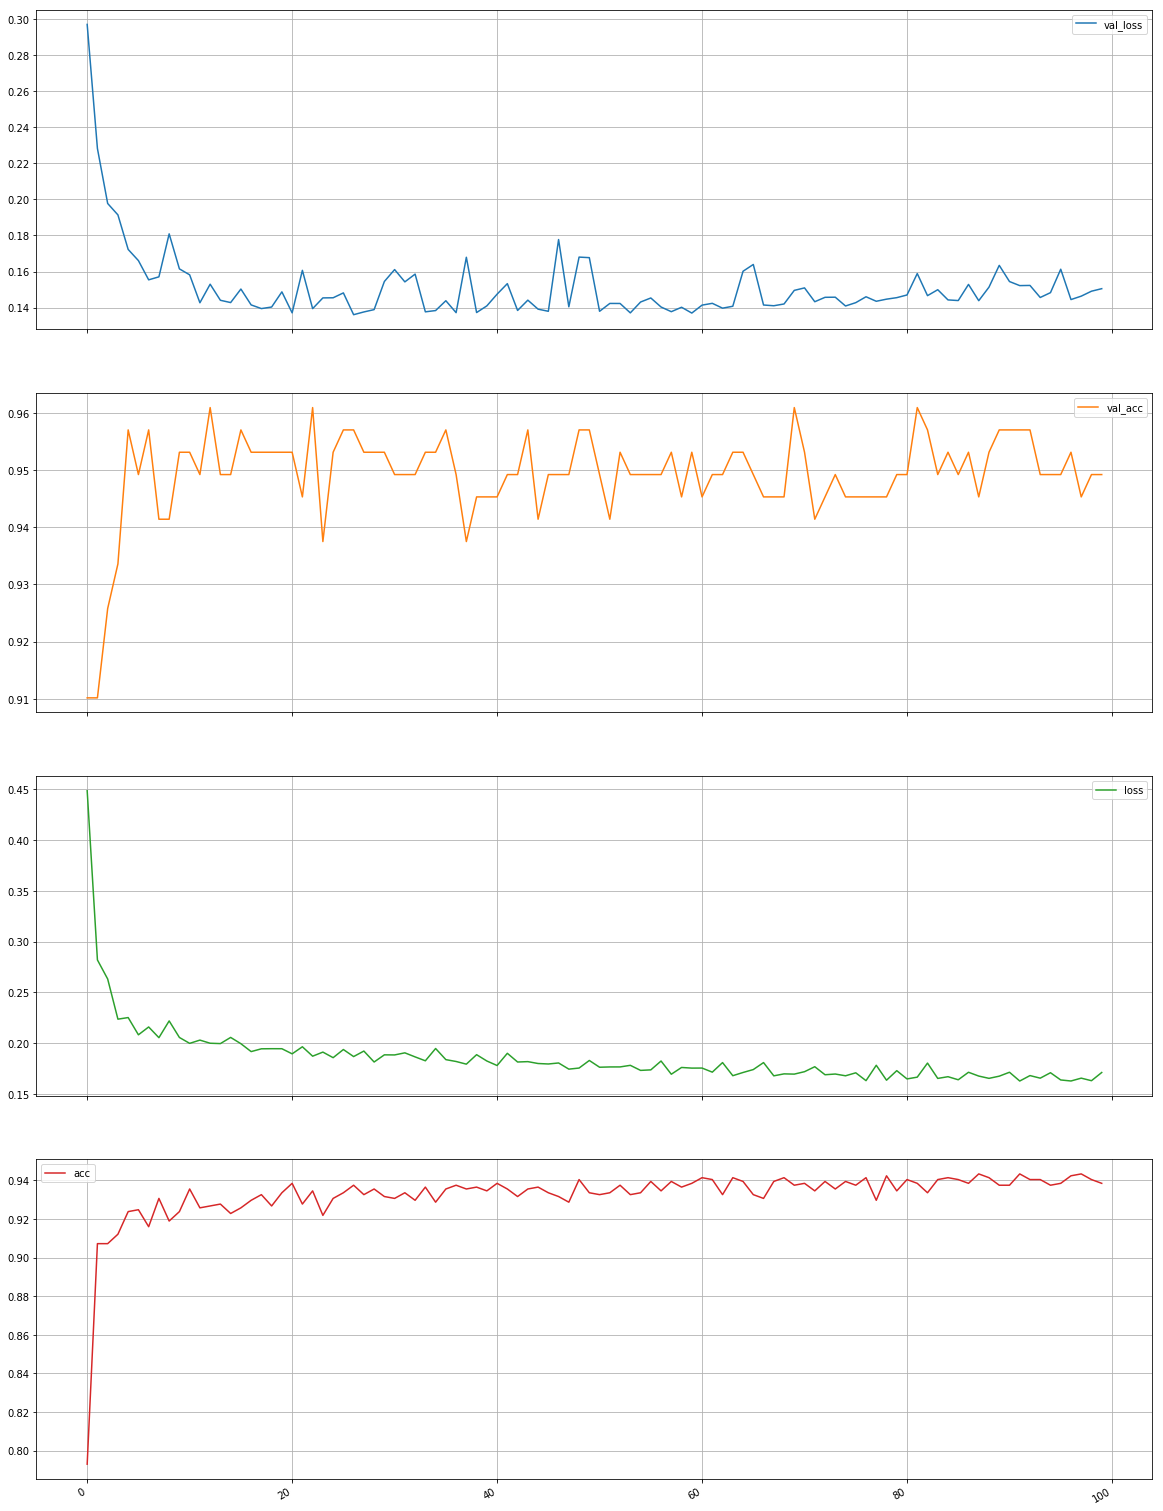

In [256]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(20,30))

## Neural Networks :: Human Features Concat 

In [257]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 18
drop_out = 0.2
first_dense_layer_nodes  = 4096
second_dense_layer_nodes = 2

def get_model():
    
    # Why do we need a model?
    # Why use Dense layer and then activation?
    # Why use sequential model with layers?
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    
    # Why dropout?
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    # Why Softmax?
    
    model.summary()
    
    # Why use categorical_crossentropy?
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [258]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 4096)              77824     
_________________________________________________________________
activation_27 (Activation)   (None, 4096)              0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 4096)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 2)                 8194      
_________________________________________________________________
activation_28 (Activation)   (None, 2)                 0         
Total params: 86,018
Trainable params: 86,018
Non-trainable params: 0
_________________________________________________________________


In [259]:
validation_data_split = 0.2 # the ratio the validation size to total traing size
num_epochs = 10000
model_batch_size = 128 #the minibatch size that we are using the mini batch gradient decent.
tb_batch_size = 32
early_patience = 100 
"""the numer of epochs after which the traing hs to be stopped if the Accuracy doesn't improve"""  

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

from keras.utils import np_utils
Y_train = np_utils.to_categorical(ConcatenatedTrainingTarget, 2)

In [260]:
history = model.fit(ConcatenatedTrainingDataMatrix.transpose()
                    , Y_train
                    , validation_split=validation_data_split
                    , epochs=100
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 1024 samples, validate on 256 samples
Epoch 1/100
1024/1024 [==============================] - 0s 231us/step - loss: 0.8826 - acc: 0.5801 - val_loss: 0.5859 - val_acc: 0.6641
Epoch 2/100
1024/1024 [==============================] - 0s 43us/step - loss: 0.5209 - acc: 0.7500 - val_loss: 0.6692 - val_acc: 0.6523
Epoch 3/100
1024/1024 [==============================] - 0s 39us/step - loss: 0.4713 - acc: 0.7812 - val_loss: 0.4521 - val_acc: 0.8203
Epoch 4/100
1024/1024 [==============================] - 0s 39us/step - loss: 0.4761 - acc: 0.7715 - val_loss: 0.4481 - val_acc: 0.8086
Epoch 5/100
1024/1024 [==============================] - 0s 41us/step - loss: 0.4133 - acc: 0.8145 - val_loss: 0.4004 - val_acc: 0.8398
Epoch 6/100
1024/1024 [==============================] - 0s 41us/step - loss: 0.4158 - acc: 0.8164 - val_loss: 0.5293 - val_acc: 0.7461
Epoch 7/100
1024/1024 [==============================] - 0s 42us/step - loss: 0.4013 - acc: 0.8223 - val_loss: 0.3574 - val_acc: 0.8750


1024/1024 [==============================] - 0s 40us/step - loss: 0.1261 - acc: 0.9629 - val_loss: 0.1692 - val_acc: 0.9414
Epoch 61/100
1024/1024 [==============================] - 0s 40us/step - loss: 0.1330 - acc: 0.9561 - val_loss: 0.1294 - val_acc: 0.9688
Epoch 62/100
1024/1024 [==============================] - 0s 40us/step - loss: 0.1249 - acc: 0.9648 - val_loss: 0.1531 - val_acc: 0.9609
Epoch 63/100
1024/1024 [==============================] - 0s 41us/step - loss: 0.1500 - acc: 0.9404 - val_loss: 0.1894 - val_acc: 0.9375
Epoch 64/100
1024/1024 [==============================] - 0s 41us/step - loss: 0.1526 - acc: 0.9434 - val_loss: 0.1305 - val_acc: 0.9648
Epoch 65/100
1024/1024 [==============================] - 0s 40us/step - loss: 0.1238 - acc: 0.9609 - val_loss: 0.1436 - val_acc: 0.9609
Epoch 66/100
1024/1024 [==============================] - 0s 41us/step - loss: 0.1147 - acc: 0.9707 - val_loss: 0.1840 - val_acc: 0.9492
Epoch 67/100
1024/1024 [==============================

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c3f7c3d68>,
      dtype=object)

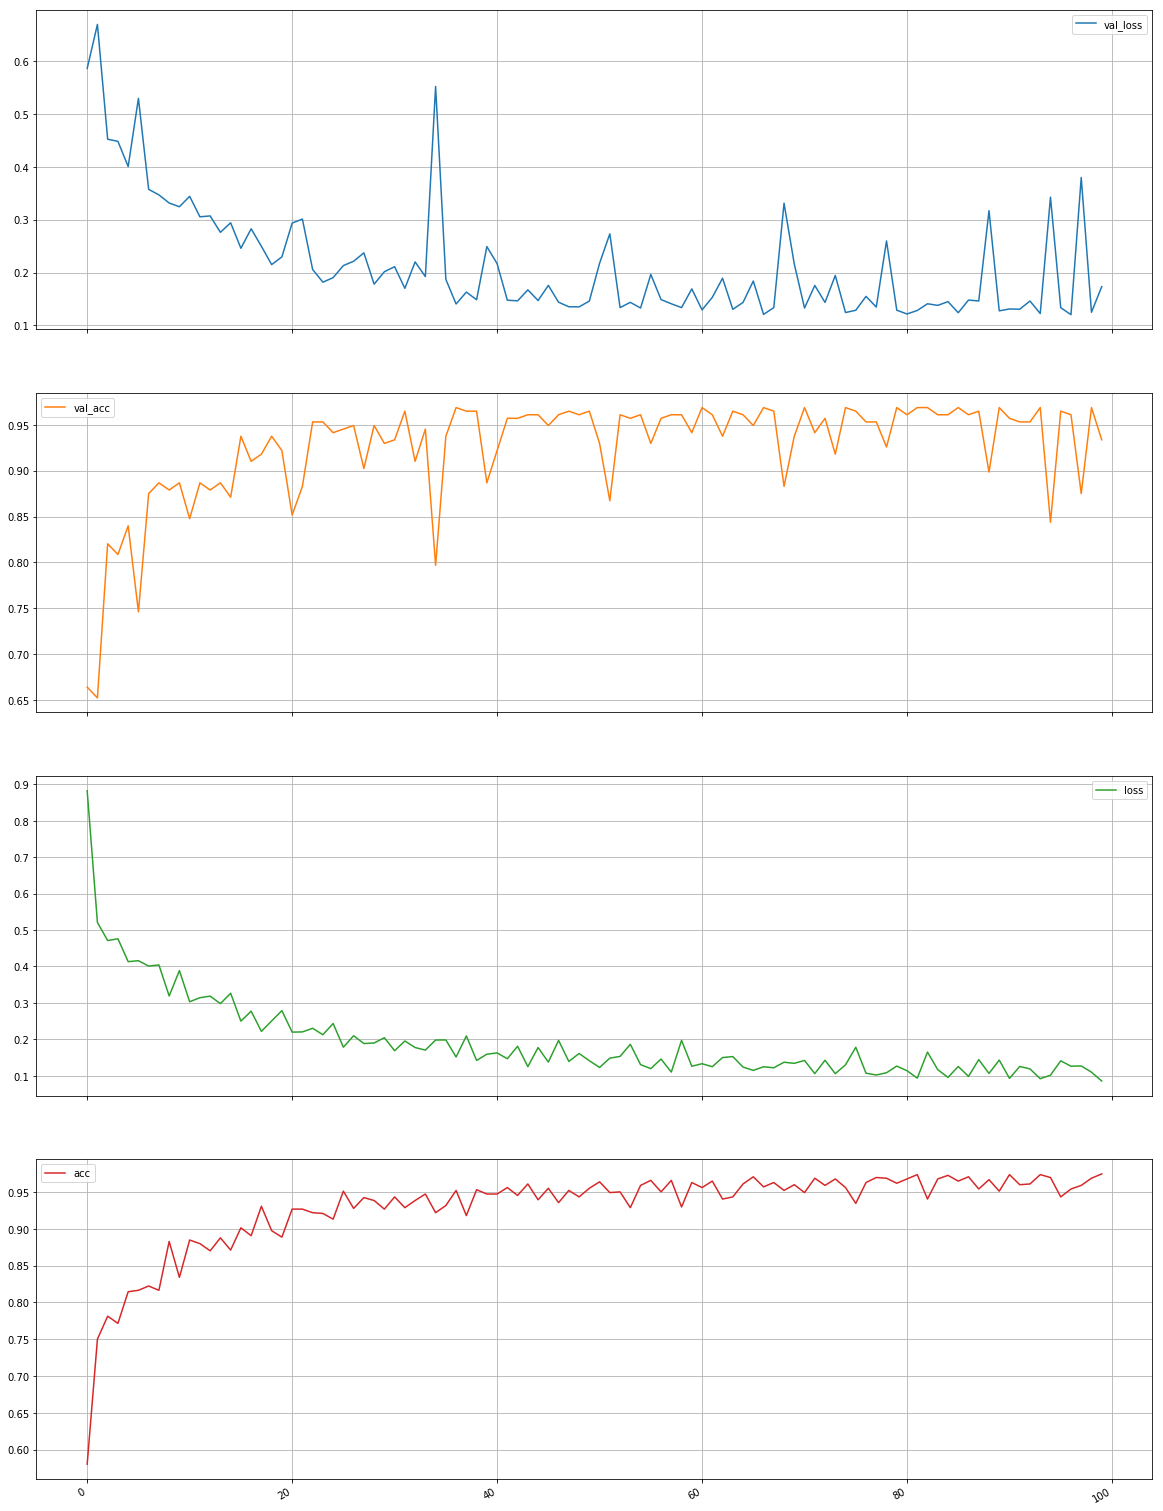

In [261]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(20,30))